In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

 

def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}

def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)

 

n_epochs = 1000
batch_size = 50

best_loss_val = np.infty
check_interval = 500
checks_since_last_progress = 0
max_checks_without_progress = 20
best_model_params = None

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True})
            if iteration % check_interval == 0:
                loss_val = loss.eval(feed_dict={X: mnist.validation.images,
                                                y: mnist.validation.labels})
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                else:
                    checks_since_last_progress += 1
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: mnist.validation.images,
                                           y: mnist.validation.labels})
        print("Epoch {}, train accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
                  epoch, acc_train * 100, acc_val * 100, best_loss_val))
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break

    if best_model_params:
        restore_model_params(best_model_params)
    acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                        y: mnist.test.labels})
    print("최종 정확도:", acc_test)
    save_path = saver.save(sess, "./my_mnist_model")

In [ ]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "훈련 정확도:", acc_train, "테스트 정확도:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model") 

In [ ]:
height = 28 # 이미지 사이즈
width = 28 #  28x28 = 784 ( 로딩 )
channels = 1 # 컬러 표현
n_inputs = height * width # 784 ( 로딩 )

#  layer 1번 구성
conv1_fmaps = 32 # 출력
conv1_ksize = 3 # kernel size 가로 세로 동일
conv1_stride = 1 # 촘촘하게
conv1_pad = "SAME" # 입력 형태 출력 차수 동일하게 ( padding )
# layer 2번
conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2 #
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps  # 64

n_fc1 = 64 #  dimensionality of the output space.
n_outputs = 10  #  숫자 이미지

reset_graph() # 초기화
# namespace
with tf.name_scope("inputs"):  # 지도학습 - 비지도학습 : target변수여부
    # 로딩되는 이미지의 차원은 일차원
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")#   주입되는 데이터 정의
    # 흑백이미지로 로딩되었다. =>
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])# 60000
    # 0,1,2,3,4,5,6,7,8,9
    y = tf.placeholder(tf.int32, shape=[None], name="y") # onehotencoding 이미지

# name을 써주는 이유 : 메모리 위치확인
#  convolution : 데이터 , 필터, 스트라이드, 패딩 (출력차수를 조정하고 이미지 주변의 특징도 고려하기 위해)\
# 스트라이드 : 이미지 사이즈를 줄인다.
# 필터사이즈와 출력채널을 결정
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
 # activation함수 : 값을 제한, 비선형으로 매핑

conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"): # 풀링
    # 4개를 한개로 제일 큰값으로 : 특징
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7]) # flatten

with tf.name_scope("fc1"): # 64차가 출력
   # 가중치 준비 입력 찾수에 맞추어서 행을 맞추고 열은 64특징으로 추출
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    # 10개의 특징으로 추출
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")# softmax  분류할 때 사용 0~1 사이의 확률값으로 조정

with tf.name_scope("train"):
    # entropy  정보기반의 불순도를 재는 함수
    # cost function (차이를 구하는 함수 )
 # 매개변수는 예측값하고 실제값
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer() # momemtum, leraring rate 율을 고려한 옵티마이저
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1) # 10개가 나오고 , y는 한개 ( 범주형일 경우에 사용 )
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) # 정확도가 발생

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()  # 모델 저장하는 객체
# FFNN( feed forward neurl network
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "훈련 정확도:", acc_train, "테스트 정확도:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model") 

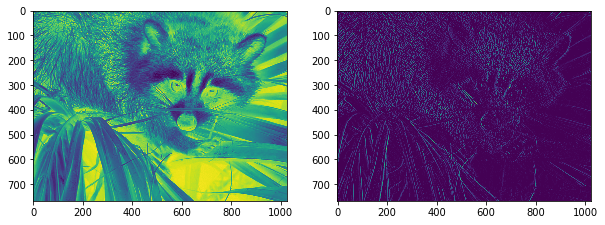

In [2]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage
img = 255 - sp.misc.face(gray=True).astype(float)
k = np.zeros((2,2))
k[:,0] = 1; k[:,1] = -1


img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show() 

W0921 13:21:57.480052  9228 deprecation.py:323] From C:\Users\KITCOOP\Anaconda3\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


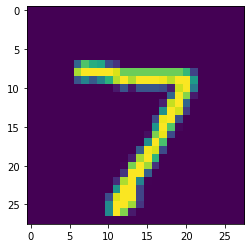

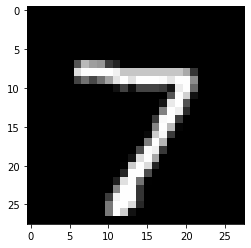

W0921 13:21:58.679658  9228 deprecation.py:506] From <ipython-input-5-eb7675a7cce5>:65: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Step 1, Minibatch Loss= 69240.0078, Training Accuracy= 0.133
Step 10, Minibatch Loss= 24113.6191, Training Accuracy= 0.242
Step 20, Minibatch Loss= 8549.0664, Training Accuracy= 0.586
Step 30, Minibatch Loss= 6986.1328, Training Accuracy= 0.680
Step 40, Minibatch Loss= 5100.5171, Training Accuracy= 0.734
Step 50, Minibatch Loss= 2925.6743, Training Accuracy= 0.805
Step 60, Minibatch Loss= 2641.2224, Training Accuracy= 0.812
Step 70, Minibatch Loss= 1736.3047, Training Accuracy= 0.883
Step 80, Minibatch Loss= 5383.7896, Training Accuracy= 0.781
Step 90, Minibatch Loss= 2641.4167, Training Accuracy= 0.836
Step 100, Minibatch Loss= 824.1011, Training Accuracy= 0.953
Step 110, Minibatch Loss= 2017.6273, Training Accuracy= 0.898
Step 120, Minibatch Loss= 2193.4231, Training Accuracy= 0.875
Step 130, Minibatch Loss= 1151.9836, Training Accuracy= 0.906
Step 140, Minibatch Loss= 2189.0640, Training Accuracy= 0.891
Step 150, Minibatch Loss= 1433.2924, Training Accuracy= 0.914
Step 160, Minibatc

In [5]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.Session()
image  = tf.reshape ( mnist.test.images[0:5] , [-1, 28,28])
channel = tf.transpose ( image[0], perm= [ 0,1]) 

np_list = sess.run(channel )
plt.imshow(np_list)
plt.show()

 

with tf.Session() as sess:
    first_image = mnist.test.images[0]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
   

learning_rate = 0.001
num_steps = 500
batch_size = 128
display_step = 10

num_input = 784
num_classes = 10
dropout = 0.75

X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32)

   
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

   
def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2) 
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)


    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]]) 
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)

    fc1 = tf.nn.dropout(fc1, dropout)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out']) #
    return out


weights = { 
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}
biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

 

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=logits, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

 

correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))

accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


init = tf.global_variables_initializer()

 

with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:

            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                      Y: mnist.test.labels[:256],
                                      keep_prob: 1.0}))
 

In [16]:
x = tf.placeholder(tf.float32,[None,n_input])
y = tf.placeholder(tf.float32,[None,n_input])

def conv2d(name, l_input, w, b):
    return tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(l_input, w, strides=[1, 1, 1, 1],
                                                  padding='SAME'),b), name=name)

def max_pool(name, l_input, k):
    return tf.nn.max_pool(l_input, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME', name=name)

def norm(name, l_input, lsize=4):
    return tf.nn.lrn(l_input, lsize, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name=name)

def alex_net(_X, _weights, _biases, _dropout):

    _X = tf.reshape(_X, shape=[-1, 28, 28, 1])

    conv1 = conv2d('conv1', _X, _weights['wc1'], _biases['bc1'])
    pool1 = max_pool('pool1', conv1, k=2)

    norm1 = norm('norm1', pool1, lsize=4)
    norm1 = tf.nn.dropout(norm1, _dropout)

    conv2 = conv2d('conv2', norm1, _weights['wc2'], _biases['bc2'])

    pool2 = max_pool('pool2', conv2, k=2)

    norm2 = norm('norm2', pool2, lsize=4)

    norm2 = tf.nn.dropout(norm2, _dropout)


    conv3 = conv2d('conv3', norm2, _weights['wc3'], _biases['bc3'])

    pool3 = max_pool('pool3', conv3, k=2)

    norm3 = norm('norm3', pool3, lsize=4)

    norm3 = tf.nn.dropout(norm3, _dropout)

    dense1 = tf.reshape(norm3, [-1, _weights['wd1'].get_shape().as_list()[0]])

    dense1 = tf.nn.relu(tf.matmul(dense1, _weights['wd1']) + _biases['bd1'], name='fc1')
   

    dense2 = tf.nn.relu(tf.matmul(dense1, _weights['wd2']) + _biases['bd2'], name='fc2')


    out = tf.matmul(dense2, _weights['out']) + _biases['out']
    return out


weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 1, 64])),
    'wc2': tf.Variable(tf.random_normal([3, 3, 64, 128])),
    'wc3': tf.Variable(tf.random_normal([3, 3, 128, 256])),
    'wd1': tf.Variable(tf.random_normal([4*4*256, 1024])),
    'wd2': tf.Variable(tf.random_normal([1024, 1024])),
    'out': tf.Variable(tf.random_normal([1024, 10]))
}
biases = {
    'bc1': tf.Variable(tf.random_normal([64])),
    'bc2': tf.Variable(tf.random_normal([128])),
    'bc3': tf.Variable(tf.random_normal([256])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'bd2': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

pred = alex_net(x,weights,biases,keep_prob)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    step = 1
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys, keep_prob: dropout})
        if step % display_step == 0:
            acc = sess.run(accuracy, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            loss = sess.run(cost, feed_dict={x: batch_xs, y: batch_ys, keep_prob: 1.})
            print ("Iter " + str(step*batch_size) + ", Minibatch Loss= " \
                  + "{:.6f}".format(loss) + ", Training Accuracy= " + "{:.5f}".format(acc))
        step += 1
    print ("Optimization Finished!")

    print ("Testing Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                                             y: mnist.test.labels[:256],
                                                             keep_prob: 1.})) 

NameError: name 'n_input' is not defined

In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets.cifar10 import load_data

def next_batch(num,data,labels):
    idx = np.arange(0,len(data))
    nprandom.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i]for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle),np.asarray(labels_shuffle)

In [23]:
def build_CNN_classifier(x):

  x_image = x


  W_conv1 = tf.Variable(tf.truncated_normal(shape=[5, 5, 3, 64], stddev=5e-2))
  b_conv1 = tf.Variable(tf.constant(0.1, shape=[64]))
  h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)


  h_pool1 = tf.nn.max_pool(h_conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')


  W_conv2 = tf.Variable(tf.truncated_normal(shape=[5, 5, 64, 64], stddev=5e-2))
  b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))
  h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)


  h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='SAME')

  W_conv3 = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], stddev=5e-2))
  b_conv3 = tf.Variable(tf.constant(0.1, shape=[128]))
  h_conv3 = tf.nn.relu(tf.nn.conv2d(h_pool2, W_conv3, strides=[1, 1, 1, 1], padding='SAME') + b_conv3)


  W_conv4 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128], stddev=5e-2))
  b_conv4 = tf.Variable(tf.constant(0.1, shape=[128]))
  h_conv4 = tf.nn.relu(tf.nn.conv2d(h_conv3, W_conv4, strides=[1, 1, 1, 1], padding='SAME') + b_conv4)

  W_conv5 = tf.Variable(tf.truncated_normal(shape=[3, 3, 128, 128], stddev=5e-2))
  b_conv5 = tf.Variable(tf.constant(0.1, shape=[128]))
  h_conv5 = tf.nn.relu(tf.nn.conv2d(h_conv4, W_conv5, strides=[1, 1, 1, 1], padding='SAME') + b_conv5)


  W_fc1 = tf.Variable(tf.truncated_normal(shape=[8 * 8 * 128, 384], stddev=5e-2))
  b_fc1 = tf.Variable(tf.constant(0.1, shape=[384]))

  h_conv5_flat = tf.reshape(h_conv5, [-1, 8*8*128])
  h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

  h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


  W_fc2 = tf.Variable(tf.truncated_normal(shape=[384, 10], stddev=5e-2))
  b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))
  logits = tf.matmul(h_fc1_drop,W_fc2) + b_fc2
  y_pred = tf.nn.softmax(logits)

  return y_pred, logits


x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
y = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)


(x_train, y_train), (x_test, y_test) = load_data()

y_train_one_hot = tf.squeeze(tf.one_hot(y_train, 10),axis=1)
y_test_one_hot = tf.squeeze(tf.one_hot(y_test, 10),axis=1)


y_pred, logits = build_CNN_classifier(x)


loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits))
train_step = tf.train.RMSPropOptimizer(1e-3).minimize(loss)


correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(10000):
    batch = next_batch(128, x_train, y_train_one_hot.eval())


    if i % 100 == 0:
      train_accuracy = accuracy.eval(feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})
      loss_print = loss.eval(feed_dict={x: batch[0], y: batch[1], keep_prob: 1.0})

      print("반복(Epoch): %d, 트레이닝 데이터 정확도: %f, 손실 함수(loss): %f" % (i, train_accuracy, loss_print))
    sess.run(train_step, feed_dict={x: batch[0], y: batch[1], keep_prob: 0.8})

  test_accuracy = 0.0 
  for i in range(10):
    test_batch = next_batch(1000, x_test, y_test_one_hot.eval())
    test_accuracy = test_accuracy + accuracy.eval(feed_dict={x: test_batch[0], y: test_batch[1], keep_prob: 1.0})
  test_accuracy = test_accuracy / 10;
  print("테스트 데이터 정확도: %f" % test_accuracy)

 

170500096/170498071 [==============================] - 1556s 9us/step


W0921 17:02:09.140862  9228 deprecation.py:323] From <ipython-input-23-52217c7aaf92>:66: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W0921 17:02:09.268542  9228 deprecation.py:506] From C:\Users\KITCOOP\Anaconda3\lib\site-packages\tensorflow\python\training\rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


NameError: name 'nprandom' is not defined